<a href="https://colab.research.google.com/github/vedantnib/Machine-Learning/blob/master/5%5DSpam_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will classify spam and ham sms. We will extract TF-IDF features from the messages using techniques learned in feature extraction and processing, and classify the messages using logistic regression.
We will use SMS Spam Classificaation Data Set from UCI ML Repository. The link for the same is : https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection 

In [ ]:
import pandas as pd
df=pd.read_csv('/content/SMSSpamCollection', delimiter='\t',header=None)
print(df.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


The ham messages are labelled with 0 and the spam messages are labelled with 1. Inspecting the data may reveal other attributes that should be captured in the model.

In [ ]:
print("Spam messages: ",df[df=='spam'][0].count())
print("Ham messages: ",df[df=='ham'][0].count())

Spam messages:  747
Ham messages:  4825


Let's make some predictions using sklearn's LogisticRegression class.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
#previously train_test_split,cross_val_score were under cross_validation, but are now under model_selection

df=pd.read_csv('/content/SMSSpamCollection', delimiter='\t',header=None)
#train_test_split assigns 75% data to training set and 25% to test set by default
#in the argument of function train_test_split(), we put df[1] i.e the message first because we assign it
# X-axis as it is our explanatory variable and df[0] i.e 'spam/ham' to Y-axis as it is our response variable
X_train_raw,X_test_raw,y_train,y_test=train_test_split(df[1],df[0])


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


Next we create a TfidVectorizer. We fit training messages, and transform both the training and test messages.

In [ ]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train_raw)
X_test=vectorizer.transform(X_test_raw)

Finally, we create an instance of LogisticRegression and train our model. Like LinearRegression, LogisticRegression implements the fit() and predict() methods.

In [ ]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
for i,prediction in zip(X_test_raw[:50],predictions[:50]):
  print ("Prediction: %s, Message: %s " %(prediction, i))


Prediction: ham, Message: We took hooch for a walk toaday and i fell over! Splat! Grazed my knees and everything! Should have stayed at home! See you tomorrow!  
Prediction: ham, Message: Now only i reached home. . . I am very tired now. . I will come tomorro 
Prediction: ham, Message: Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@ 
Prediction: ham, Message: I love working from home :) 
Prediction: ham, Message: Left dessert. U wan me 2 go suntec look 4 u? 
Prediction: ham, Message: 88800 and 89034 are premium phone services call 08718711108 
Prediction: ham, Message: Thanks for being there for me just to talk to on saturday. You are very dear to me. I cherish having you as a brother and role model. 
Prediction: 

How well does our classifier perform? This performance metrics we used for linear gression are inappropriate for this task.

Let's deviate from the sms spam detection dataset for a while lets focus a and know a bit about ***Binary classification performance metrics.***


[[4 1]
 [2 3]]


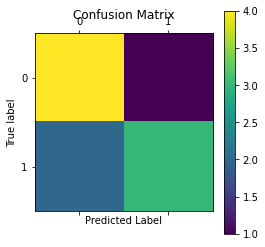

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_test=[0,0,0,0,0,1,1,1,1,1]
y_pred=[0,1,0,0,0,0,0,1,1,1]
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted Label')
plt.show()

# ***ACCURACY***
Accuracy measures a fraction of classifier's predictions that are correct. sklearn provides a function to calculate the accuracy of of the set of predictions given the correct labels.


In [ ]:
from sklearn.metrics import accuracy_score
y_pred,y_true=[0,1,1,0],[1,1,1,1]
print("Accuracy: ",accuracy_score(y_true,y_pred))

Accuracy:  0.5


LogisticRegression.score() predicts scores labels for a test set using accuracy. Let's bring back our ***sms spam dataset*** back into picture and evaluate our classifier's accuracy.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
#we had imported our csv earlier so no need to import it again. However, in a new notebook or program, you need to import it.
X_train_raw,X_test_raw,y_train,y_test=train_test_split(df[1],df[0])
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train_raw)
X_test=vectorizer.transform(X_test_raw)
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
scores=cross_val_score(classifier,X_train,y_train,cv=7)
print(np.mean(scores))
print(scores)

0.9569274946159367
[0.95309883 0.95309883 0.95812395 0.95979899 0.95979899 0.97152429
 0.94304858]


Note that accuracy may differ as the training and test sets are assigned randomly. While accuracy measures the overall correctness of the classifier, it does not distinguish between false positive errors and false negative errors. Some applications may be more sensitive to false negatives than false positives, or vice versa. Furthermore, Accuracy is not an informative metric if the proportions of the classes are skewed in population. For example, a classifier that predicts whether or not credit card transactions are fraudulent may be more sensitive to false negatives than false positives. That is, most transactions are legitimate, accuracy is not an appropriate metric for this problem. A classifier that always predicts transactions are legitimate could have a high accuracy score, but would not be useful. For these reasons, classifiers are often evaluated using two additional measures called ***PRECISION*** and ***RECALL***.

# ***Precision and Recall***
Precision: The precision is the fraction of positive predictions that are correct. In our case, precision if the fraction of messages classified as spam that are actually spam. Given by ration: ***P=TP/(TP+FP)***, TP=True Positive, FP=False Positive.
Recall: Recall is the fraction of the truly positive instances that the classifier recognizes. In our case, recall is fraction of spam messages that were truly classified as spam. Given by ratio: R=TP/(TP+FN)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import precision_score, recall_score, make_scorer,f1_score #get precision and recall
#we had imported our csv earlier so no need to import it again. However, in a new notebook or program, you need to import it.
X_train_raw,X_test_raw,y_train,y_test=train_test_split(df[1],df[0])
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train_raw)
X_test=vectorizer.transform(X_test_raw)
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
precision_scorer = make_scorer(precision_score, pos_label='spam')
precision=cross_val_score(classifier,X_train,y_train,cv=5,scoring=precision_scorer)
print("Precision mean: ",np.mean(precision))
print("Precision: ",precision)
recall_scorer = make_scorer(recall_score, pos_label='spam')
recall=cross_val_score(classifier,X_train,y_train,cv=7,scoring=recall_scorer)
print("Recall mean: ",np.mean(recall))
print("Recall: ",recall)

Precision mean:  0.9923076923076923
Precision:  [1.         1.         0.96153846 1.         1.        ]
Recall mean:  0.6648583484026522
Recall:  [0.65384615 0.64102564 0.66666667 0.70512821 0.6835443  0.59493671
 0.70886076]


Our classifier's precision is 0.9869; almost all the messages that were predicted as spam were actually spam.
It's recall is lower i.e it incorrectly classified 31%(1-0.6992) of spam messages as ham.

# Calculating the F1 measure.
The F1 measure is the harmonic mean, or weighted average, of the precision and recall scores. Also called the f-measure or the f-score. 
Formula: F1=2*(PR/(P+R)), P=Precision, R=Recall
The F1=measure penalizes classifiers with imbalanced precision and recall scores, like the trivial classifier that always predicts positive class. A model with perfect precision and recall scores will achieve an F1-score of 1. A model with a perfect precision and a recall of 0 will achieve a f1-score of 1.

In [ ]:
from sklearn.metrics import f1_score
f1_scorer=make_scorer(f1_score, pos_label='spam')
f1=cross_val_score(classifier,X_train,y_train,cv=5,scoring=f1_scorer)
print("F1 Score Mean: ",np.mean(f1))
print("F1 Scores: ",f1)



F1 Score Mean:  0.7866178760342091
F1 Scores:  [0.77777778 0.79781421 0.79787234 0.76404494 0.79558011]


# ***Tuning models with Grid Search***
Hyperparamters are parameters of the model that are not learned. For example, hyperparameters of our logistic regression SMS classifier include the value of the regularization term and thresholds used to remove words that appear too frequently or infrequently.
Grid Search takes a set of possible values for each hyperparameter that should be tuned, and evaluates the model trained on each element of Cartesian product of sets. That is, Grid Search is an exhaustive search that trains and evaluates the model for each possible combination of hyperparamter values supplied by the developer. A con of grid search is its compuational cost.

GridSearchCV() takes an estimator, a parameter space, and a performance measure. The argument n_jobs specifies the maximum number of concurrent jobs; set n_jobs=-1 to use all CPU cores. Note that fit() must be called in Python main block in order to fork additional processes; this example must be executed as a script, an not as an interactive interpreter.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import precision_score, recall_score, make_scorer,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline=Pipeline([('vect',TfidfVectorizer(stop_words='english')),('clf',LogisticRegression())])

parameters={
    'vect__max_df':(0.25,0.5,0.75),          #all the keys contain double underscore(__) as you can see, single underscore will give an error.
    'vect__stop_words':('english','None'),
    'vect__max_features':(2500,5000,1000, None),
    'vect__ngram_range':((1,1),(1,2)),
    'vect__use_idf':(True,False),
    'vect__norm':('l1','l2'),
    'clf__penalty':('l1','l2'),
    'clf__C':(0.01,0.1,1,10),

}
if __name__=="__main__":
  grid_search=GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy',cv=3)
  X,y=df[1],df[0]
  X_train,X_test,y_train,y_test=train_test_split(X,y)
  grid_search.fit(X_train,y_train)
  print("Best score: %0.3f" %grid_search.best_score_)
  print("Best scores parameters set: ")
  best_parameters=grid_search.best_estimator_.get_params() #The .best_estimator_ attribute is an instance of the specified model type,
  # which has the 'best' combination of given parameters from the param_grid. 
  for param_name in sorted(parameters.keys()):
    print('\t%s: %r'%(param_name,best_parameters[param_name]))
  predictions=grid_search.predict(X_test)
  print("Accuracy: ", accuracy_score(y_test, predictions))
  print("Precision: ", precision_score(y_test, predictions,pos_label='spam'))
  print("Recall: ", recall_score(y_test, predictions,pos_label='spam'))



Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4608 out of 4608 | elapsed:  3.7min finished


Best score: 0.980
Best scores parameters set: 
	clf__C: 10
	clf__penalty: 'l2'
	vect__max_df: 0.25
	vect__max_features: 1000
	vect__ngram_range: (1, 2)
	vect__norm: 'l2'
	vect__stop_words: 'english'
	vect__use_idf: False
Accuracy:  0.9834888729361091
Precision:  0.9702380952380952
Recall:  0.9005524861878453


Optimizing the values of the hyperparameters has improved our model's recall score on the test set.